# 영문 워드 크라우드

In [8]:
#NLTK(Natural Language ToolKit)
import nltk

In [9]:
# COLAB에서는 접속할때마다 다운 받아야함
# 주피터에서는 1번만 하면 사용가능
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords

# 1.stopwords(불용어)처리

In [11]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# wordCloud 에서 제공하는 불용어
sw_wc = STOPWORDS
print(sw_wc)

{'than', 'my', 'doing', 'so', 'themselves', "you're", "we'll", 'com', "shouldn't", "you'll", 'http', 'any', 'theirs', "wouldn't", 'being', 'ought', "don't", 'your', 'this', 'own', 'while', 'few', 'itself', 'to', 'he', 'were', 'there', 'they', 'she', 'those', "wasn't", 'the', "what's", "it's", "he's", "i'd", 'same', "there's", 'shall', 'into', 'himself', "doesn't", 'about', 'an', "can't", "that's", 'therefore', 'some', 'our', "we'd", 'ourselves', 'had', 'all', 'else', 'if', "let's", 'for', 'under', "aren't", 'between', 'only', 'other', 'otherwise', 'out', 'up', 'was', 'by', "couldn't", 'has', "when's", 'like', 'is', "who's", 'yours', 'that', 'which', "won't", 'off', 'am', 'be', 'or', 'then', 'them', "i'm", "they'd", 'their', "you've", 'k', "i've", "they'll", 'get', 'could', "isn't", 'most', "he'd", 'against', 'once', 'such', 'her', 'after', 'what', 'just', 'because', 'www', "haven't", 'with', 'yourself', "here's", 'i', 'a', "shan't", "mustn't", "weren't", "how's", 'over', 'since', 'when

In [13]:
print(len(sw_nltk), len(sw_wc))

179 192


# 2. 이상한나라엘리스 분석

In [14]:
with open('./Alice.txt') as file:
  text = file.read()

In [15]:
# 'said' 단어를 불용어 처리 추가
sw_wc.add('said')

In [16]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc)
wc = wc.generate(text)
print(wc)

In [17]:
count = 0
for key, value in wc.words_.items():
  print(key, ':', value)
  count += 1
  if count > 10:
    break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


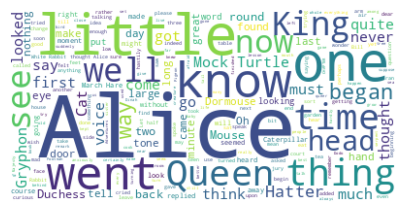

In [18]:
plt.figure(figsize=(5, 3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 그림위에 표시하기

In [19]:
mask = np.array(Image.open('./Alice_mask.png'))

In [20]:
print(mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


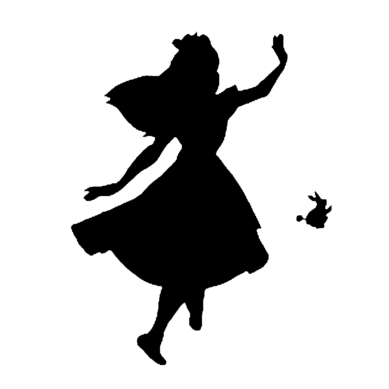

In [21]:
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc, mask=mask).generate(text)

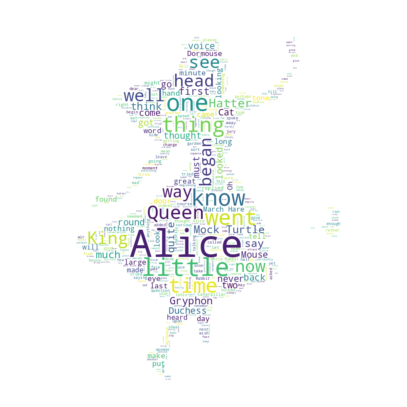

In [23]:
plt.figure(figsize=(5,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Star Wars

In [32]:
with open('/content/A_new_hope.txt') as file:
  text = file.read()

In [34]:
text = text.replace('HAN', 'Han').replace("LUKES'S", 'Luke')

In [35]:
sw = STOPWORDS
sw.add('int')
sw.add('ext')
len(sw)

195

In [ ]:
mask = np.array(Image.open('/content/Stormtrooper_mask.png'))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
wc = WordCloud(background_color='white', max_words=1000,
               stopwords=sw, mask=mask).generate(text)

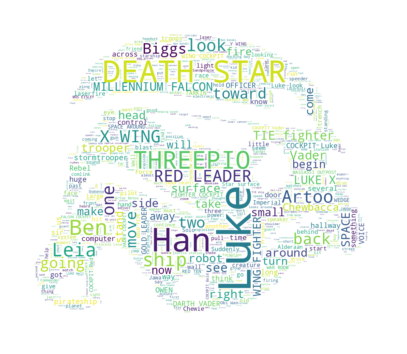

In [40]:
plt.figure(figsize=(5,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()